**DATA LOADING**

In [ ]:
import pandas as pd
import re

In [ ]:
# Load datasets
jd_data = pd.read_csv('jd.csv')
resume_data = pd.read_csv('UpdatedResumeDataSet.csv')

In [ ]:
# Display the first few rows of each dataset
print("Job Description Data:")
print(jd_data.head())

print("\nResume Data:")
print(resume_data.head())

Job Description Data:
      Experience Qualifications                     Job Title  \
0  5 to 15 Years         M.Tech  Digital Marketing Specialist   
1  2 to 12 Years            BCA                 Web Developer   
2  0 to 12 Years            PhD            Operations Manager   
3  4 to 11 Years            PhD              Network Engineer   
4  1 to 12 Years            MBA                 Event Manager   

                                     Job Description  \
0  Social Media Managers oversee an organizations...   
1  Frontend Web Developers design and implement u...   
2  Quality Control Managers establish and enforce...   
3  Wireless Network Engineers design, implement, ...   
4  A Conference Manager coordinates and manages c...   

                                              skills  
0  Social media platforms (e.g., Facebook, Twitte...  
1  HTML, CSS, JavaScript Frontend frameworks (e.g...  
2  Quality control processes and methodologies St...  
3  Wireless network design and

In [ ]:
print(jd_data.shape)
print(resume_data.shape)

(5001, 5)
(962, 2)


In [ ]:
# Display basic information about each dataset
print("\nJob Description Data Info:")
print(jd_data.info())

print("\nResume Data Info:")
print(resume_data.info())


Job Description Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Experience       5001 non-null   object
 1   Qualifications   5001 non-null   object
 2   Job Title        5001 non-null   object
 3   Job Description  5001 non-null   object
 4   skills           5001 non-null   object
dtypes: object(5)
memory usage: 195.5+ KB
None

Resume Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None


In [ ]:
# Display summary statistics for numerical columns
print("\nJob Description Data Summary Statistics:")
print(jd_data.describe())

print("\nResume Data Summary Statistics:")
print(resume_data.describe())


Job Description Data Summary Statistics:
           Experience Qualifications       Job Title  \
count            5001           5001            5001   
unique             48             10             147   
top     5 to 15 Years         B.Tech  UX/UI Designer   
freq              131            544             154   

                                          Job Description  \
count                                                5001   
unique                                                376   
top     Interaction Designers specialize in designing ...   
freq                                                   61   

                                                   skills  
count                                                5001  
unique                                                376  
top     Interaction design principles User behavior an...  
freq                                                   61  

Resume Data Summary Statistics:
              Category                

**DATA CLEANING**

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Initialize stemmer and stop words
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# General text cleaning function
def clean_text(text):
    if pd.isnull(text):  # Check if the text is null
        return ""
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters and punctuation
    text = text.lower().strip()  # Convert to lowercase and remove extra whitespace
    return text

# Cleaning jd_data columns
def clean_jd_data(jd_data):

    # Cleaning 'Qualifications' column: remove periods, standardize case, and strip whitespace
    jd_data['Qualifications'] = jd_data['Qualifications'].apply(lambda x: re.sub(r'\.', '', str(x)).lower().strip())

    # Cleaning 'Job Title' column: remove special characters, standardize case, and strip whitespace
    jd_data['Job Title'] = jd_data['Job Title'].apply(clean_text)

    # Cleaning 'Job Description' column: remove special characters, standardize case, and strip whitespace
    jd_data['Job Description'] = jd_data['Job Description'].apply(clean_text)

    # Cleaning 'skills' column: remove special characters, standardize case, and strip whitespace
    jd_data['skills'] = jd_data['skills'].apply(clean_text)

    return jd_data

# Cleaning resume_data columns
def clean_resume_data(resume_data):
    # Cleaning 'Category' column: remove special characters, standardize case, and strip whitespace
    resume_data['Category'] = resume_data['Category'].apply(clean_text)

    # Cleaning 'Resume' column: remove special characters, standardize case, and strip whitespace
    resume_data['Resume'] = resume_data['Resume'].apply(clean_text)

    return resume_data

# Apply the cleaning functions
jd_data = clean_jd_data(jd_data)
resume_data = clean_resume_data(resume_data)

# Display the cleaned data (for testing and validation)
print("Cleaned jd_data:")
print(jd_data.head())

print("\nCleaned resume_data:")
print(resume_data.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Cleaned jd_data:
      Experience Qualifications                     Job Title  \
0  5 to 15 Years          mtech  digital marketing specialist   
1  2 to 12 Years            bca                 web developer   
2  0 to 12 Years            phd            operations manager   
3  4 to 11 Years            phd              network engineer   
4  1 to 12 Years            mba                 event manager   

                                     Job Description  \
0  social media managers oversee an organizations...   
1  frontend web developers design and implement u...   
2  quality control managers establish and enforce...   
3  wireless network engineers design implement an...   
4  a conference manager coordinates and manages c...   

                                              skills  
0  social media platforms eg facebook twitter ins...  
1  html css javascript frontend frameworks eg rea...  
2  quality control processes and methodologies st...  
3  wireless network design and arch

In [ ]:
print(jd_data.head())
print(resume_data.head())

      Experience Qualifications                     Job Title  \
0  5 to 15 Years          mtech  digital marketing specialist   
1  2 to 12 Years            bca                 web developer   
2  0 to 12 Years            phd            operations manager   
3  4 to 11 Years            phd              network engineer   
4  1 to 12 Years            mba                 event manager   

                                     Job Description  \
0  social media managers oversee an organizations...   
1  frontend web developers design and implement u...   
2  quality control managers establish and enforce...   
3  wireless network engineers design implement an...   
4  a conference manager coordinates and manages c...   

                                              skills  
0  social media platforms eg facebook twitter ins...  
1  html css javascript frontend frameworks eg rea...  
2  quality control processes and methodologies st...  
3  wireless network design and architecture wifi ...

In [ ]:
import pandas as pd

# Function to check if a DataFrame is clean
def check_dataframe_cleanliness(df, name):
    print(f"\nChecking cleanliness of {name}:")

    # Check for missing values
    missing_values = df.isnull().sum()
    print("\nMissing values in each column:")
    print(missing_values[missing_values > 0])

    # Check for duplicates
    duplicates = df.duplicated().sum()
    print(f"\nNumber of duplicate rows: {duplicates}")

    # Check for unwanted characters in string columns
    for column in df.select_dtypes(include='object').columns:
        unwanted_chars = df[column].str.contains(r'[^\w\s]', na=False)
        if unwanted_chars.any():
            print(f"\nUnwanted characters found in column '{column}':")
            print(df[column][unwanted_chars].unique())

def clean_text(text):
    if isinstance(text, str):
        # Remove unwanted characters, including non-ASCII characters
        text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # Remove non-ASCII characters
        text = text.replace('\r', ' ').replace('\n', ' ')  # Replace line breaks
        text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
        text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
        return text.strip()  # Remove leading and trailing spaces
    return text

    # Check basic statistics for numerical columns
    print("\nBasic statistics for numerical columns:")
    print(df.describe())

    # Additional checks can be added here based on specific requirements

# Check jd_data cleanliness
check_dataframe_cleanliness(jd_data, "jd_data")

# Check resume_data cleanliness
check_dataframe_cleanliness(resume_data, "resume_data")


Checking cleanliness of jd_data:

Missing values in each column:
Series([], dtype: int64)

Number of duplicate rows: 76

Checking cleanliness of resume_data:

Missing values in each column:
Series([], dtype: int64)

Number of duplicate rows: 794


In [ ]:
jd_data.drop_duplicates(inplace=True)
resume_data.drop_duplicates(inplace=True)

In [ ]:
# Check for duplicates in both datasets
jd_duplicates = jd_data.duplicated().sum()  # Count of duplicate rows in jd_data
resume_duplicates = resume_data.duplicated().sum()  # Count of duplicate rows in resume_data

# Check for missing values in both datasets
jd_missing_values = jd_data.isnull().sum()  # Count of missing values in each column of jd_data
resume_missing_values = resume_data.isnull().sum()  # Count of missing values in each column of resume_data

# Summary of data cleaning checks
print("Data Cleaning Summary:\n")
print(f"JD Data - Duplicates removed: {jd_duplicates}")
print(f"JD Data - Missing values:\n{jd_missing_values[jd_missing_values > 0]}\n")  # Show only columns with missing values

print(f"Resume Data - Duplicates removed: {resume_duplicates}")
print(f"Resume Data - Missing values:\n{resume_missing_values[resume_missing_values > 0]}\n")  # Show only columns with missing values

# Check for unique values in key columns (if applicable)
# Example assuming 'Job_Title' is a key column in jd_data and 'Name' in resume_data
if 'Job_Title' in jd_data.columns:
    unique_job_titles = jd_data['Job_Title'].nunique()
    print(f"JD Data - Unique Job Titles: {unique_job_titles}")

if 'Name' in resume_data.columns:
    unique_names = resume_data['Name'].nunique()
    print(f"Resume Data - Unique Names: {unique_names}")

Data Cleaning Summary:

JD Data - Duplicates removed: 0
JD Data - Missing values:
Series([], dtype: int64)

Resume Data - Duplicates removed: 0
Resume Data - Missing values:
Series([], dtype: int64)



In [ ]:
 def check_text_preprocessing(df, column_names):
    for column_name in column_names:
        # Check for non-alphabetic characters
        non_alpha_count = df[column_name].str.count(r'[^a-zA-Z\s]').sum()

        # Check for lowercase conversion
        lowercase_count = df[column_name].str.islower().sum()

        # Check for stop words removal
        stop_words = set(stopwords.words('english'))
        stop_words_removed = df[column_name].apply(lambda x: len([word for word in x.split() if word.lower() not in stop_words]))
        avg_stop_words_removed = stop_words_removed.mean()

        # Tokenization (counting the average number of tokens)
        token_count = df[column_name].apply(lambda x: len(x.split()))
        avg_token_count = token_count.mean()

        # Display the checks
        print(f"\nText Preprocessing Summary for '{column_name}':")
        print(f"Total non-alphabetic characters: {non_alpha_count}")
        print(f"Total lowercase entries: {lowercase_count}")
        print(f"Average words remaining after stop word removal: {avg_stop_words_removed:.2f}")
        print(f"Average token count per entry: {avg_token_count:.2f}")

# Check multiple columns in jd_data and resume_data
check_text_preprocessing(jd_data, ['Qualifications', 'Job Title', 'Job Description'])
check_text_preprocessing(resume_data, ['Category', 'Resume'])


Text Preprocessing Summary for 'Qualifications':
Total non-alphabetic characters: 0
Total lowercase entries: 4925
Average words remaining after stop word removal: 1.00
Average token count per entry: 1.00

Text Preprocessing Summary for 'Job Title':
Total non-alphabetic characters: 0
Total lowercase entries: 4925
Average words remaining after stop word removal: 2.09
Average token count per entry: 2.10

Text Preprocessing Summary for 'Job Description':
Total non-alphabetic characters: 32
Total lowercase entries: 4925
Average words remaining after stop word removal: 17.82
Average token count per entry: 24.24

Text Preprocessing Summary for 'Category':
Total non-alphabetic characters: 0
Total lowercase entries: 168
Average words remaining after stop word removal: 1.64
Average token count per entry: 1.68

Text Preprocessing Summary for 'Resume':
Total non-alphabetic characters: 8700
Total lowercase entries: 168
Average words remaining after stop word removal: 322.41
Average token count per

In [ ]:
def clean_text(df, column_names):
    for column_name in column_names:
        # Remove non-alphabetic characters and convert to lowercase
        df[column_name] = df[column_name].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x).lower().strip())

        # Remove extra whitespace
        df[column_name] = df[column_name].apply(lambda x: ' '.join(x.split()))

# Clean text in jd_data and resume_data
clean_text(jd_data, ['Qualifications', 'Job Title', 'Job Description'])
clean_text(resume_data, ['Category', 'Resume'])

In [ ]:
def check_cleaning_effectiveness(df, column_names):
    for column_name in column_names:
        # Check for non-alphabetic characters
        non_alpha_count = df[column_name].str.count(r'[^a-zA-Z\s]').sum()

        # Check for lowercase conversion
        lowercase_count = df[column_name].str.islower().sum()

        # Check for leading or trailing whitespace
        whitespace_count = df[column_name].str.startswith(' ').sum() + df[column_name].str.endswith(' ').sum()

        # Display the cleaning effectiveness results
        print(f"\nData Cleaning Summary for '{column_name}':")
        print(f"Total non-alphabetic characters remaining: {non_alpha_count}")
        print(f"Total lowercase entries: {lowercase_count}")
        print(f"Total entries with leading or trailing whitespace: {whitespace_count}")

# Check the effectiveness of cleaning for jd_data and resume_data
check_cleaning_effectiveness(jd_data, ['Qualifications', 'Job Title', 'Job Description'])
check_cleaning_effectiveness(resume_data, ['Category', 'Resume'])


Data Cleaning Summary for 'Qualifications':
Total non-alphabetic characters remaining: 0
Total lowercase entries: 4925
Total entries with leading or trailing whitespace: 0

Data Cleaning Summary for 'Job Title':
Total non-alphabetic characters remaining: 0
Total lowercase entries: 4925
Total entries with leading or trailing whitespace: 0

Data Cleaning Summary for 'Job Description':
Total non-alphabetic characters remaining: 0
Total lowercase entries: 4925
Total entries with leading or trailing whitespace: 0

Data Cleaning Summary for 'Category':
Total non-alphabetic characters remaining: 0
Total lowercase entries: 168
Total entries with leading or trailing whitespace: 0

Data Cleaning Summary for 'Resume':
Total non-alphabetic characters remaining: 0
Total lowercase entries: 168
Total entries with leading or trailing whitespace: 0


In [ ]:
from nltk.corpus import stopwords

def remove_stopwords(df, column_names):
    stop_words = set(stopwords.words('english'))

    for column_name in column_names:
        df[column_name] = df[column_name].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

def check_stopwords(df, column_names):
    stop_words = set(stopwords.words('english'))

    for column_name in column_names:
        stopword_count = df[column_name].apply(lambda x: len([word for word in x.split() if word in stop_words])).sum()
        print(f"Total stopwords in '{column_name}': {stopword_count}")

# Remove stopwords from job description and resume
remove_stopwords(jd_data, ['Job Title', 'Job Description'])
remove_stopwords(resume_data, ['Category', 'Resume'])

# Re-check stopwords in jd_data and resume_data after removal
print("After Stopword Removal:")
check_stopwords(jd_data, ['Job Title', 'Job Description'])
check_stopwords(resume_data, ['Category', 'Resume'])

After Stopword Removal:
Total stopwords in 'Job Title': 0
Total stopwords in 'Job Description': 0
Total stopwords in 'Category': 0
Total stopwords in 'Resume': 0


In [ ]:
def comprehensive_data_check(df, column_names):
    summary = {}
    for column_name in column_names:
        summary[column_name] = {
            'Count': df[column_name].count(),
            'Unique': df[column_name].nunique(),
            'Missing': df[column_name].isnull().sum(),
            'Sample Values': df[column_name].dropna().unique()[:5]  # Show first 5 unique values
        }
    return summary

In [ ]:
# Function to remove duplicates and clean resume data
def clean_resume_data(resume_data):
    # Remove duplicates from resume_data
    resume_data.drop_duplicates(inplace=True)

    # Clean non-alphabetic characters in the Resume column
    resume_data['Resume'] = resume_data['Resume'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x).lower().strip())
    resume_data['Resume'] = resume_data['Resume'].apply(lambda x: ' '.join(x.split()))

    # Check the data again
    resume_summary_after_cleanup = comprehensive_data_check(resume_data, ['Category', 'Resume'])

    # Display the updated results
    print("\nUpdated Resume Data Cleaning and Preprocessing Summary:")
    print(pd.DataFrame(resume_summary_after_cleanup).T)

# Define the comprehensive_data_check function
def comprehensive_data_check(df, column_names):
    summary = {}
    for column_name in column_names:
        summary[column_name] = {
            'Count': df[column_name].count(),
            'Unique': df[column_name].nunique(),
            'Missing': df[column_name].isnull().sum(),
            'Sample Values': df[column_name].dropna().unique()[:5]  # Show first 5 unique values
        }
    return summary

# Call the cleaning function
clean_resume_data(resume_data)


Updated Resume Data Cleaning and Preprocessing Summary:
         Count Unique Missing  \
Category   166     25       0   
Resume     166    166       0   

                                              Sample Values  
Category  [data science, hr, advocate, arts, web designing]  
Resume    [skills programming languages python pandas nu...  


**DATA INSIGHTS**

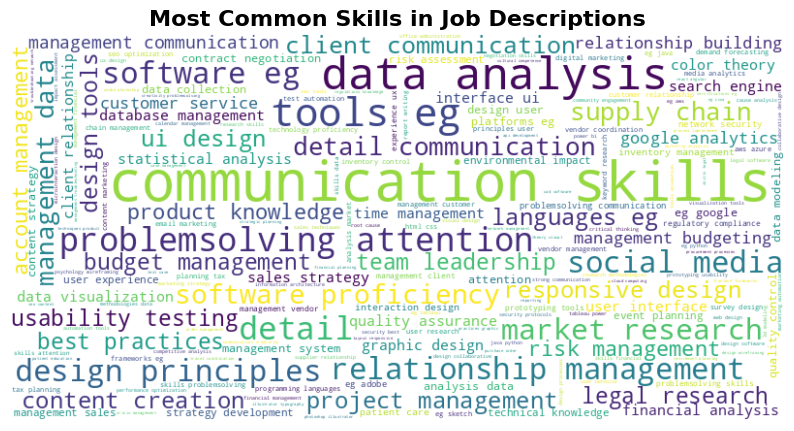

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Word Cloud for Skills
skills_text = ' '.join(jd_data['skills'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skills_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Skills in Job Descriptions', fontsize=16, fontweight='bold')
plt.show()

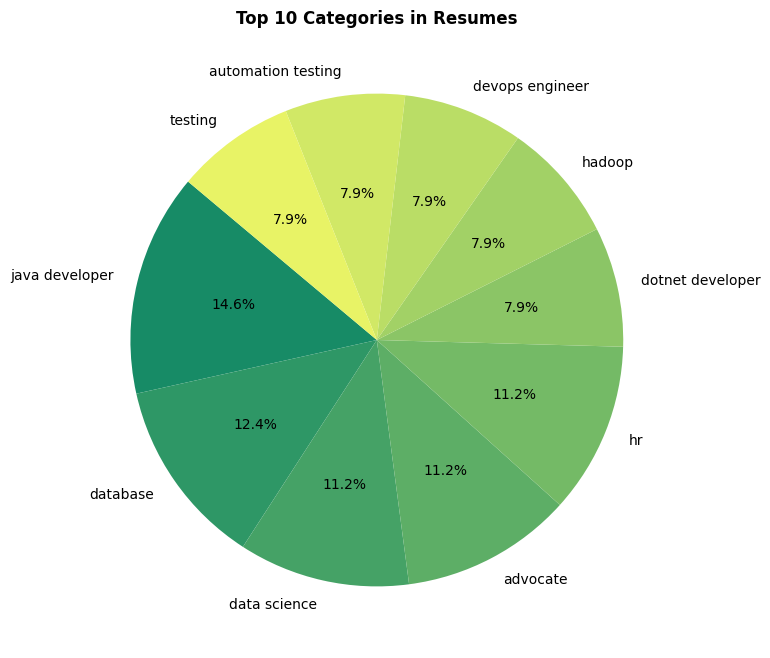

In [ ]:
# Count the top 10 categories
top_categories = resume_data['Category'].value_counts().iloc[:10]

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("summer", len(top_categories)))
plt.title('Top 10 Categories in Resumes', fontweight='bold')
plt.show()

<ipython-input-27-ca85ffcc4bab>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette="viridis")


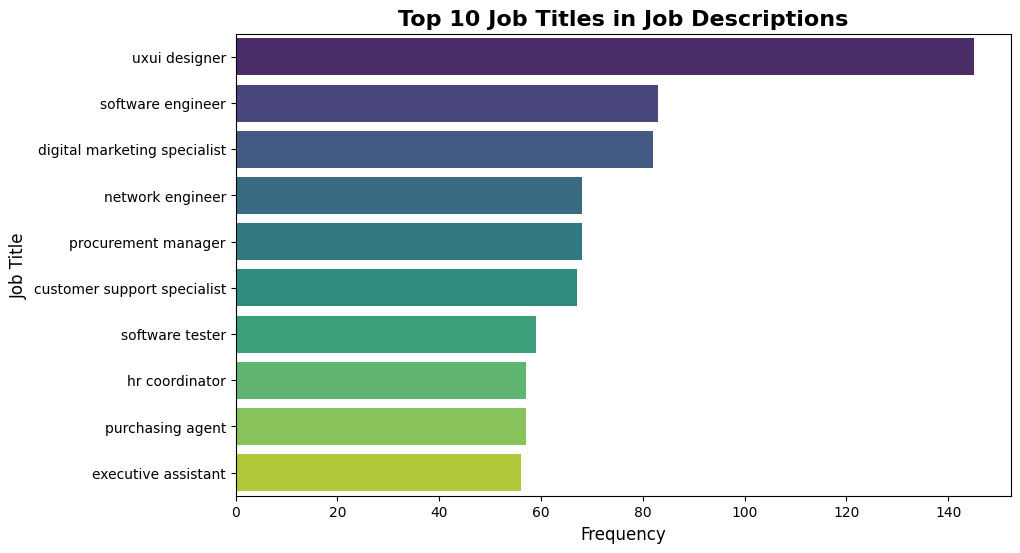

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Count the top 10 job titles
top_job_titles = jd_data['Job Title'].value_counts().iloc[:10]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette="viridis")

# Adding title and labels
plt.title('Top 10 Job Titles in Job Descriptions', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Job Title', fontsize=12)

plt.show()

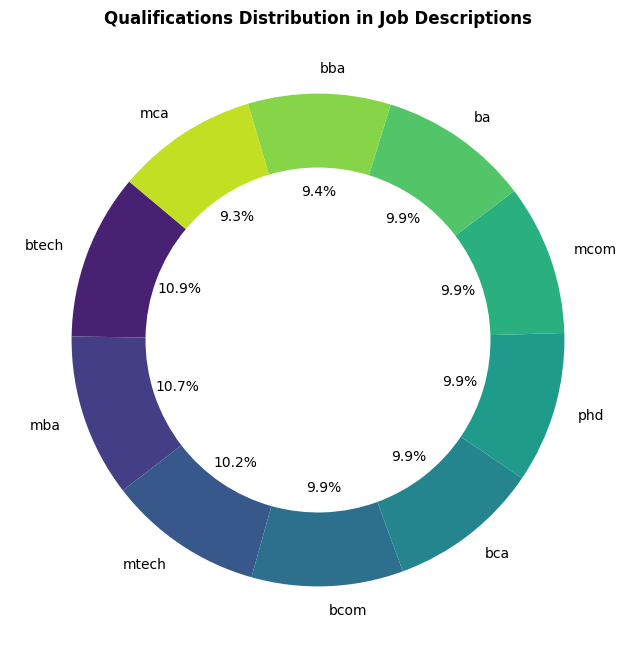

In [ ]:
# Count qualifications distribution
qualifications_counts = jd_data['Qualifications'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(qualifications_counts, labels=qualifications_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(qualifications_counts)), wedgeprops=dict(width=0.3))
plt.title('Qualifications Distribution in Job Descriptions', fontweight='bold')
plt.show()